In [1]:
import pandas as pd
import os
path="../../Data/"
import numpy as np
import re

In [2]:
def findcols(df,string):
    return [col for col in df if string in col]

In [3]:
def nonnull_eids(df,col):
    eids=df['eid'][pd.notnull(df[col])]
    df_out=df[['eid',col]][pd.notnull(df[col])]
    return eids,df_out

In [4]:
def convert_null(df):
    for col in df.columns:
        mask=(df[col]=='Prefer not to answer')
        df[col][mask]=np.NaN
    return df
        

In [ ]:
%%time
ukb_tp0=pd.read_parquet(path+'ukb_tp0_new.parquet')
#ukb_tp0=pd.read_parquet(path+'ukb_tp0_new.parquet',columns=cols80_exc)

In [6]:
disease_cols=findcols(ukb_tp0,'first_reported')+['eid']+['date_of_attending_assessment_centre_f53_0_0']

In [1]:
disease_cols_df=pd.DataFrame(disease_cols)
disease_cols_df.columns=['column']
disease_cols_df.to_csv(path+'cols_disease.csv')

NameError: name 'pd' is not defined

In [8]:
death_eids=nonnull_eids(ukb_tp0,'date_of_death_f40000_0_0')[0]

In [9]:
%%time
for col in ukb_tp0.columns:
    ukb_tp0[col][(ukb_tp0[col]=='nan')]=np.NaN
cols80=[col for col in ukb_tp0.columns if ukb_tp0[col].count()/ukb_tp0.shape[0]>0.8]
cols80_df=pd.DataFrame(cols80)
cols80_df.columns=['colname']
cols80_df.to_csv(path+'cols80.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 4min 18s, sys: 26.9 s, total: 4min 45s
Wall time: 7min 58s


In [10]:
cols80_df=pd.read_csv(path+'cols80.csv')

In [11]:
cols80=list(cols80_df['colname'])
excs='source_of_report|first_reported|icd10|icd9|operative_procedures|treatment_speciality|external_ca|patient_recoded|\
hospital_polymorphic|_report|assay_date|device_id'
cols80_exc=[col for col in cols80 if not re.search(excs,col) ]

In [12]:
ukb_tp0_cols80=ukb_tp0[cols80_exc]

In [13]:
ukb_tp0_cols80=convert_null(ukb_tp0_cols80)

<ipython-input-4-f69c7aac2563>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][mask]=np.NaN
/Users/michaelallwright/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [14]:
ukb_tp0_cols80.to_parquet(path+'ukb_tp0_cols80.parquet')

#### New file

In [200]:
ordcols_full=pd.read_csv(path+'vallistcomp_edited.csv')
ordcols=ordcols_full[(ordcols_full['Do']!='Exclude')&(ordcols_full['Do']!='ohe')&pd.notnull(ordcols_full['Do'])][['column','Do']]

In [203]:
import ast
for i,col in enumerate(ordcols['column']):
    ukb_tp0_cols80[col+'_ord']=ukb_tp0_cols80[col].map(ast.literal_eval(ordcols['Do'].iloc[i]))
   

<ipython-input-203-ec36ee4a6076>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukb_tp0_cols80[col+'_ord']=ukb_tp0_cols80[col].map(ast.literal_eval(ordcols['Do'].iloc[i]))


In [190]:
ordvars=[col+'_ord' for col in ordcols['column']]

In [191]:
ctsvars=[col for col in ukb_tp0_cols80.columns if re.search('float',str(ukb_tp0_cols80[col].dtype))]
excvars=list(ordcols_full[(ordcols_full['Do']=='Exclude')]['column'])
ohe_vars=[col for col in ukb_tp0_cols80.columns if col not in ordvars+ctsvars+excvars]

In [214]:
[col for col in ukb_tp0_cols80.columns if 'death' in col]

[]

In [213]:
len(ohe_vars)

215

In [141]:
ukb_tp0_cols80['loneliness_isolation_f2020_0_0'].value_counts()

No             401188
Yes             91391
Do not know      7531
Name: loneliness_isolation_f2020_0_0, dtype: int64

In [56]:
list1[1][]

'birth_weight_known_f120_0_0'

In [43]:
list(ukb_tp0_cols80['sex_f31_0_0'].unique())

['Female', 'Male', nan]

In [44]:
len(ukb_tp0_cols80['sex_f31_0_0'].unique())

3

In [19]:
cols80_df[cols80_df['colname'].isin(cols80_exc)].sample(20)

,colname
364,mean_corpuscular_haemoglobin_f30050_0_0
24,place_of_birth_in_uk_north_coordinate_f129_0_0
155,part_of_a_multiple_birth_f1777_0_0
11,waist_circumference_f48_0_0
439,neutrophill_percentage_f30200_0_0
487,high_light_scatter_reticulocyte_percentage_dev...
626,phosphate_correction_reason_f30814_0_0
0,eid
165,fedup_feelings_f1960_0_0
344,red_blood_cell_erythrocyte_count_f30010_0_0


<AxesSubplot:>

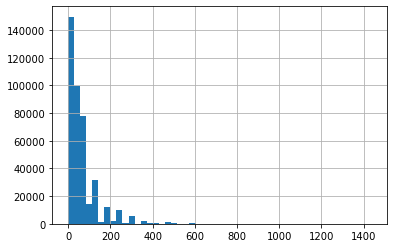

In [12]:
ukb_tp0['duration_of_moderate_activity_f894_0_0'].hist(bins=50)

In [20]:
findcols(ukb_tp0[cols80_exc],'time')

['time_since_interview_start_at_which_blood_pressure_screens_shown_f96_0_0',
 'time_since_interview_start_at_which_blood_pressure_screens_shown_f96_0_1',
 'time_to_complete_round_f400_0_1',
 'time_to_complete_round_f400_0_2',
 'number_of_times_snapbutton_pressed_f403_0_0',
 'number_of_times_snapbutton_pressed_f403_0_1',
 'number_of_times_snapbutton_pressed_f403_0_2',
 'number_of_times_snapbutton_pressed_f403_0_3',
 'number_of_times_snapbutton_pressed_f403_0_4',
 'number_of_times_snapbutton_pressed_f403_0_5',
 'number_of_times_snapbutton_pressed_f403_0_6',
 'number_of_times_snapbutton_pressed_f403_0_7',
 'number_of_times_snapbutton_pressed_f403_0_8',
 'number_of_times_snapbutton_pressed_f403_0_9',
 'number_of_times_snapbutton_pressed_f403_0_10',
 'number_of_times_snapbutton_pressed_f403_0_11',
 'length_of_time_at_current_address_f699_0_0',
 'time_spend_outdoors_in_summer_f1050_0_0',
 'time_spent_outdoors_in_winter_f1060_0_0',
 'time_spent_watching_television_tv_f1070_0_0',
 'time_spent_

In [9]:
%%time
ukb_tp0=pd.read_parquet(path+'ukb_tp0_new.parquet',columns=cols80_exc)

CPU times: user 50.7 s, sys: 23.2 s, total: 1min 13s
Wall time: 1min 4s


In [33]:
ukb_tp0['ever_had_cervical_smear_test_f2694_0_0'][(ukb_tp0['ever_had_cervical_smear_test_f2694_0_0']=='nan')]=np.NaN

<ipython-input-33-763ca480d315>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukb_tp0['ever_had_cervical_smear_test_f2694_0_0'][(ukb_tp0['ever_had_cervical_smear_test_f2694_0_0']=='nan')]=np.NaN


In [34]:
ukb_tp0['ever_had_cervical_smear_test_f2694_0_0'].count()

272871

In [8]:
ukb_tp0.to_parquet(path+'ukb_tp0_cols80.parquet',columns=cols80)

TypeError: __cinit__() got an unexpected keyword argument 'columns'

In [ ]:
%%time
ukb_tp0[cols80_exc].to_parquet(path+'ukb_tp0_cols80.parquet')

In [ ]:
%%time
ukb_tp0[cols80].shape